__CLASSIFICATION SVM__

__Data Exploration and Preperation__

In [3]:
# At first we are loading the iris dataset
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# Analysis the feature names
feature_names = iris.feature_names
print("Feature names:", feature_names)

# Analysis the target names (species)
target_names = iris.target_names
print("Target names (species):", target_names)

# Basic statistics of whole dataset
X, y = iris.data, iris.target
print("Num of samples:", len(X))
print("Num of features:", X.shape[1])
print("Num of classes:", len(target_names))

# Scaling the standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify the scaled features
print("Scaled features for the first 5 rows:\n", X_scaled[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (species): ['setosa' 'versicolor' 'virginica']
Num of samples: 150
Num of features: 4
Num of classes: 3
Scaled features for the first 5 rows:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


__SVM Implementation__

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Now we have to load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM classifiers for different type of kernels and parameters
svm_linear_low_c = SVC(kernel='linear', C=0.01)
svm_linear_high_c = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_poly = SVC(kernel='poly', degree=3, C=1)

# Now train SVM classifiers
svm_linear_low_c.fit(X_train, y_train)
svm_linear_high_c.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Predict the test data
y_pred_linear_low_c = svm_linear_low_c.predict(X_test)
y_pred_linear_high_c = svm_linear_high_c.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


__K-fold Cross-Validation__

In [5]:
# Ensure you've imported all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Shuffle the dataset
X_shuffled, y_shuffled = X_scaled.copy(), y.copy()
shuffling_indices = np.random.permutation(len(X_shuffled))
X_shuffled, y_shuffled = X_shuffled[shuffling_indices], y_shuffled[shuffling_indices]

# Define the number of folds for K-Fold cross-validation
k = 6

# K-fold cross-validation by shuffling
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Create a small dictionary to store cross-validation results for each SVM
cv_results = {}

# Define SVM classifiers with different kernels and parameters
svm_linear_low_c = SVC(kernel='linear', C=0.01)
svm_linear_high_c = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_poly = SVC(kernel='poly', degree=3, C=1)

# Cross-validation for each SVM classifier with parameters
for model_name, svm in {
    "SVM Linear (C=0.01)": svm_linear_low_c,
    "SVM Linear (C=1)": svm_linear_high_c,
    "SVM RBF": svm_rbf,
    "SVM Poly (Degree=3)": svm_poly,
}.items():
    # Apply k-fold cross-validation
    cv_scores = cross_val_score(svm, X_shuffled, y_shuffled, cv=kf)

    # Store the results for this classifier
    cv_results[model_name] = {
        "scores": cv_scores,
        "mean_score": np.mean(cv_scores),
    }

# Result for cross-validation with each SVM classifier
print(f"{k}-fold Cross-Validation Scores:")
for model_name, result in cv_results.items():
    print(f"\nModel: {model_name}")
    for i, score in enumerate(result["scores"]):
        print(f"  Fold {i + 1}: {score:.4f}")
    print(f"  Mean Accuracy: {result['mean_score']:.4f}")

6-fold Cross-Validation Scores:

Model: SVM Linear (C=0.01)
  Fold 1: 0.9200
  Fold 2: 0.9600
  Fold 3: 0.8400
  Fold 4: 0.8800
  Fold 5: 0.7600
  Fold 6: 0.8400
  Mean Accuracy: 0.8667

Model: SVM Linear (C=1)
  Fold 1: 0.9600
  Fold 2: 0.9600
  Fold 3: 1.0000
  Fold 4: 0.9600
  Fold 5: 0.9200
  Fold 6: 1.0000
  Mean Accuracy: 0.9667

Model: SVM RBF
  Fold 1: 1.0000
  Fold 2: 0.9200
  Fold 3: 1.0000
  Fold 4: 0.9600
  Fold 5: 0.9200
  Fold 6: 0.9600
  Mean Accuracy: 0.9600

Model: SVM Poly (Degree=3)
  Fold 1: 0.8400
  Fold 2: 0.9200
  Fold 3: 0.9600
  Fold 4: 0.8800
  Fold 5: 1.0000
  Fold 6: 0.9200
  Mean Accuracy: 0.9200


__Evaluation Metrics__

In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy for models
accuracy_linear_low_c = accuracy_score(y_test, y_pred_linear_low_c)
accuracy_linear_high_c = accuracy_score(y_test, y_pred_linear_high_c)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("SVM Linear (C=0.01) Accuracy:", accuracy_linear_low_c)
print("SVM Linear (C=1) Accuracy:", accuracy_linear_high_c)
print("SVM RBF Accuracy:", accuracy_rbf)
print("SVM Poly (Degree=3) Accuracy:", accuracy_poly)

# Display all the classification reports with precision, recall, F1-score, and support
print("Classification Report (SVM Linear, C=0.01):")
print(classification_report(y_test, y_pred_linear_low_c, target_names=iris.target_names))

print("Classification Report (SVM Linear, C=1):")
print(classification_report(y_test, y_pred_linear_high_c, target_names=iris.target_names))

print("Classification Report (SVM RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

print("Classification Report (SVM Poly):")
print(classification_report(y_test, y_pred_poly, target_names=iris.target_names))


SVM Linear (C=0.01) Accuracy: 0.9666666666666667
SVM Linear (C=1) Accuracy: 0.9666666666666667
SVM RBF Accuracy: 1.0
SVM Poly (Degree=3) Accuracy: 0.9666666666666667
Classification Report (SVM Linear, C=0.01):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Classification Report (SVM Linear, C=1):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.9

__Visualization analysis__

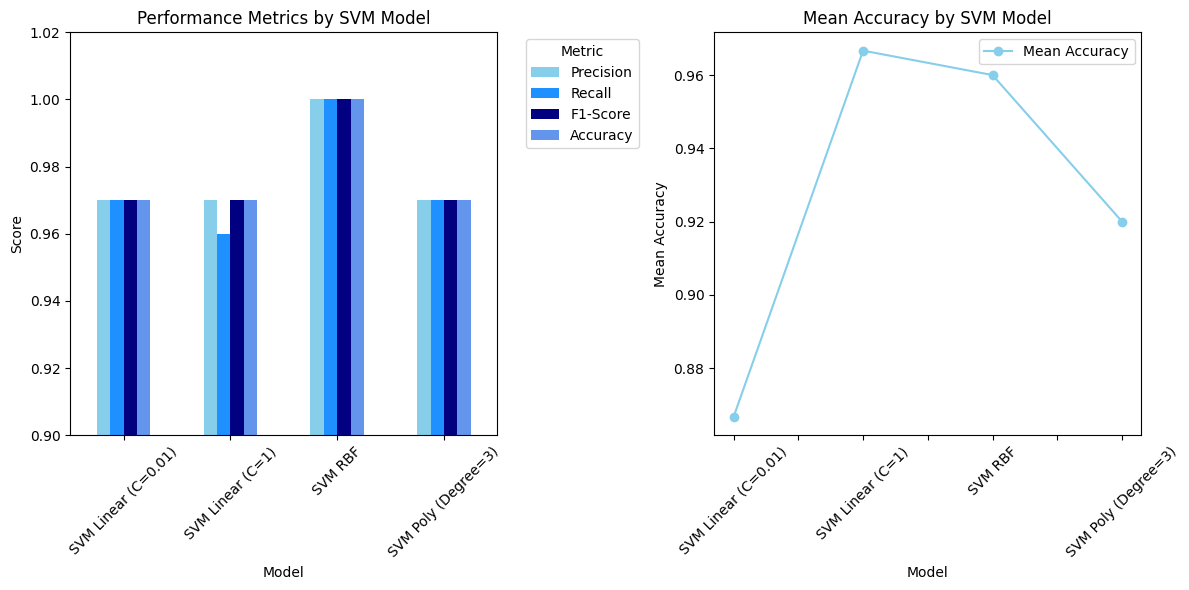

In [7]:
cv_results = {
    "SVM Linear (C=0.01)": cross_val_score(svm_linear_low_c, X_shuffled, y_shuffled, cv=kf),
    "SVM Linear (C=1)": cross_val_score(svm_linear_high_c, X_shuffled, y_shuffled, cv=kf),
    "SVM RBF": cross_val_score(svm_rbf, X_shuffled, y_shuffled, cv=kf),
    "SVM Poly (Degree=3)": cross_val_score(svm_poly, X_shuffled, y_shuffled, cv=kf),
}

# Create a DataFrame to store mean accuracy from cross-validation
cv_df = pd.DataFrame({
    "Model": list(cv_results.keys()),
    "Mean Accuracy": [scores.mean() for scores in cv_results.values()],
})

# Bar plot for various performance metrics
metric_data = {
    "Model": ["SVM Linear (C=0.01)", "SVM Linear (C=1)", "SVM RBF", "SVM Poly (Degree=3)"],
    "Precision": [0.97, 0.97, 1.00, 0.97],
    "Recall": [0.97, 0.96, 1.00, 0.97],
    "F1-Score": [0.97, 0.97, 1.00, 0.97],
    "Accuracy": [0.97, 0.97, 1.00, 0.97],
}

# Create a DataFrame from the metric data for plotting
metric_df = pd.DataFrame(metric_data)

# Create the subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot on ax[0]
metric_df.plot(kind="bar", x="Model", ax=ax[0], color=["skyblue", "dodgerblue", "navy", "cornflowerblue"], rot=45)
ax[0].set_title("Performance Metrics by SVM Model")
ax[0].set_ylabel("Score")
ax[0].legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")

ax[0].set_ylim(0.90, 1.02)

# Line plot for mean accuracy on ax[1]
cv_df.plot(kind='line', x='Model', y='Mean Accuracy', ax=ax[1], marker='o', linestyle='-', color='skyblue', rot=45)
ax[1].set_title("Mean Accuracy by SVM Model")
ax[1].set_ylabel("Mean Accuracy")

# Adjust layout and show plots
plt.tight_layout()
plt.show()